# **Movie Recommendation System**

# Objective

Recommender System is a system that seeks to predict or filter preferences according to the user's choices. Recommender systems are utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags, and products in general.

Recommender systems produce a list of recommendations in any of the two ways -
1. Collaborative filtering: Collaborative filtering approaches build a model from the user's past behavior (i.e. items purchased or searched by the user) as well as similar decisions made by other users. This model is then used to predict items (or ratings for items) that users may have an interest in.
2. Content-based filtering: Content-based filtering approaches uses a series of discrete characteristics of an item in order to recommend additional items with similar properties. Content-based filtering methods are totally based on a description of the item and a profile of the user's preferences. It recommends items based on the user's past preferences. Let's develop a basic recommendation system using Python and Pandas.

Let's develop a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. It just tells what movies/items are most similar to the user's movie choice.

# Data Source

I have used Dataset from YBI Fondations GitHub Repository named Dataset https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Movies%20Recommendation.csv

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

# Importing Data

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Movies%20Recommendation.csv')

# Describing Data

In [4]:
df.head()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [6]:
df.shape

(4760, 21)

In [7]:
df.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')

# Visualizing Data

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


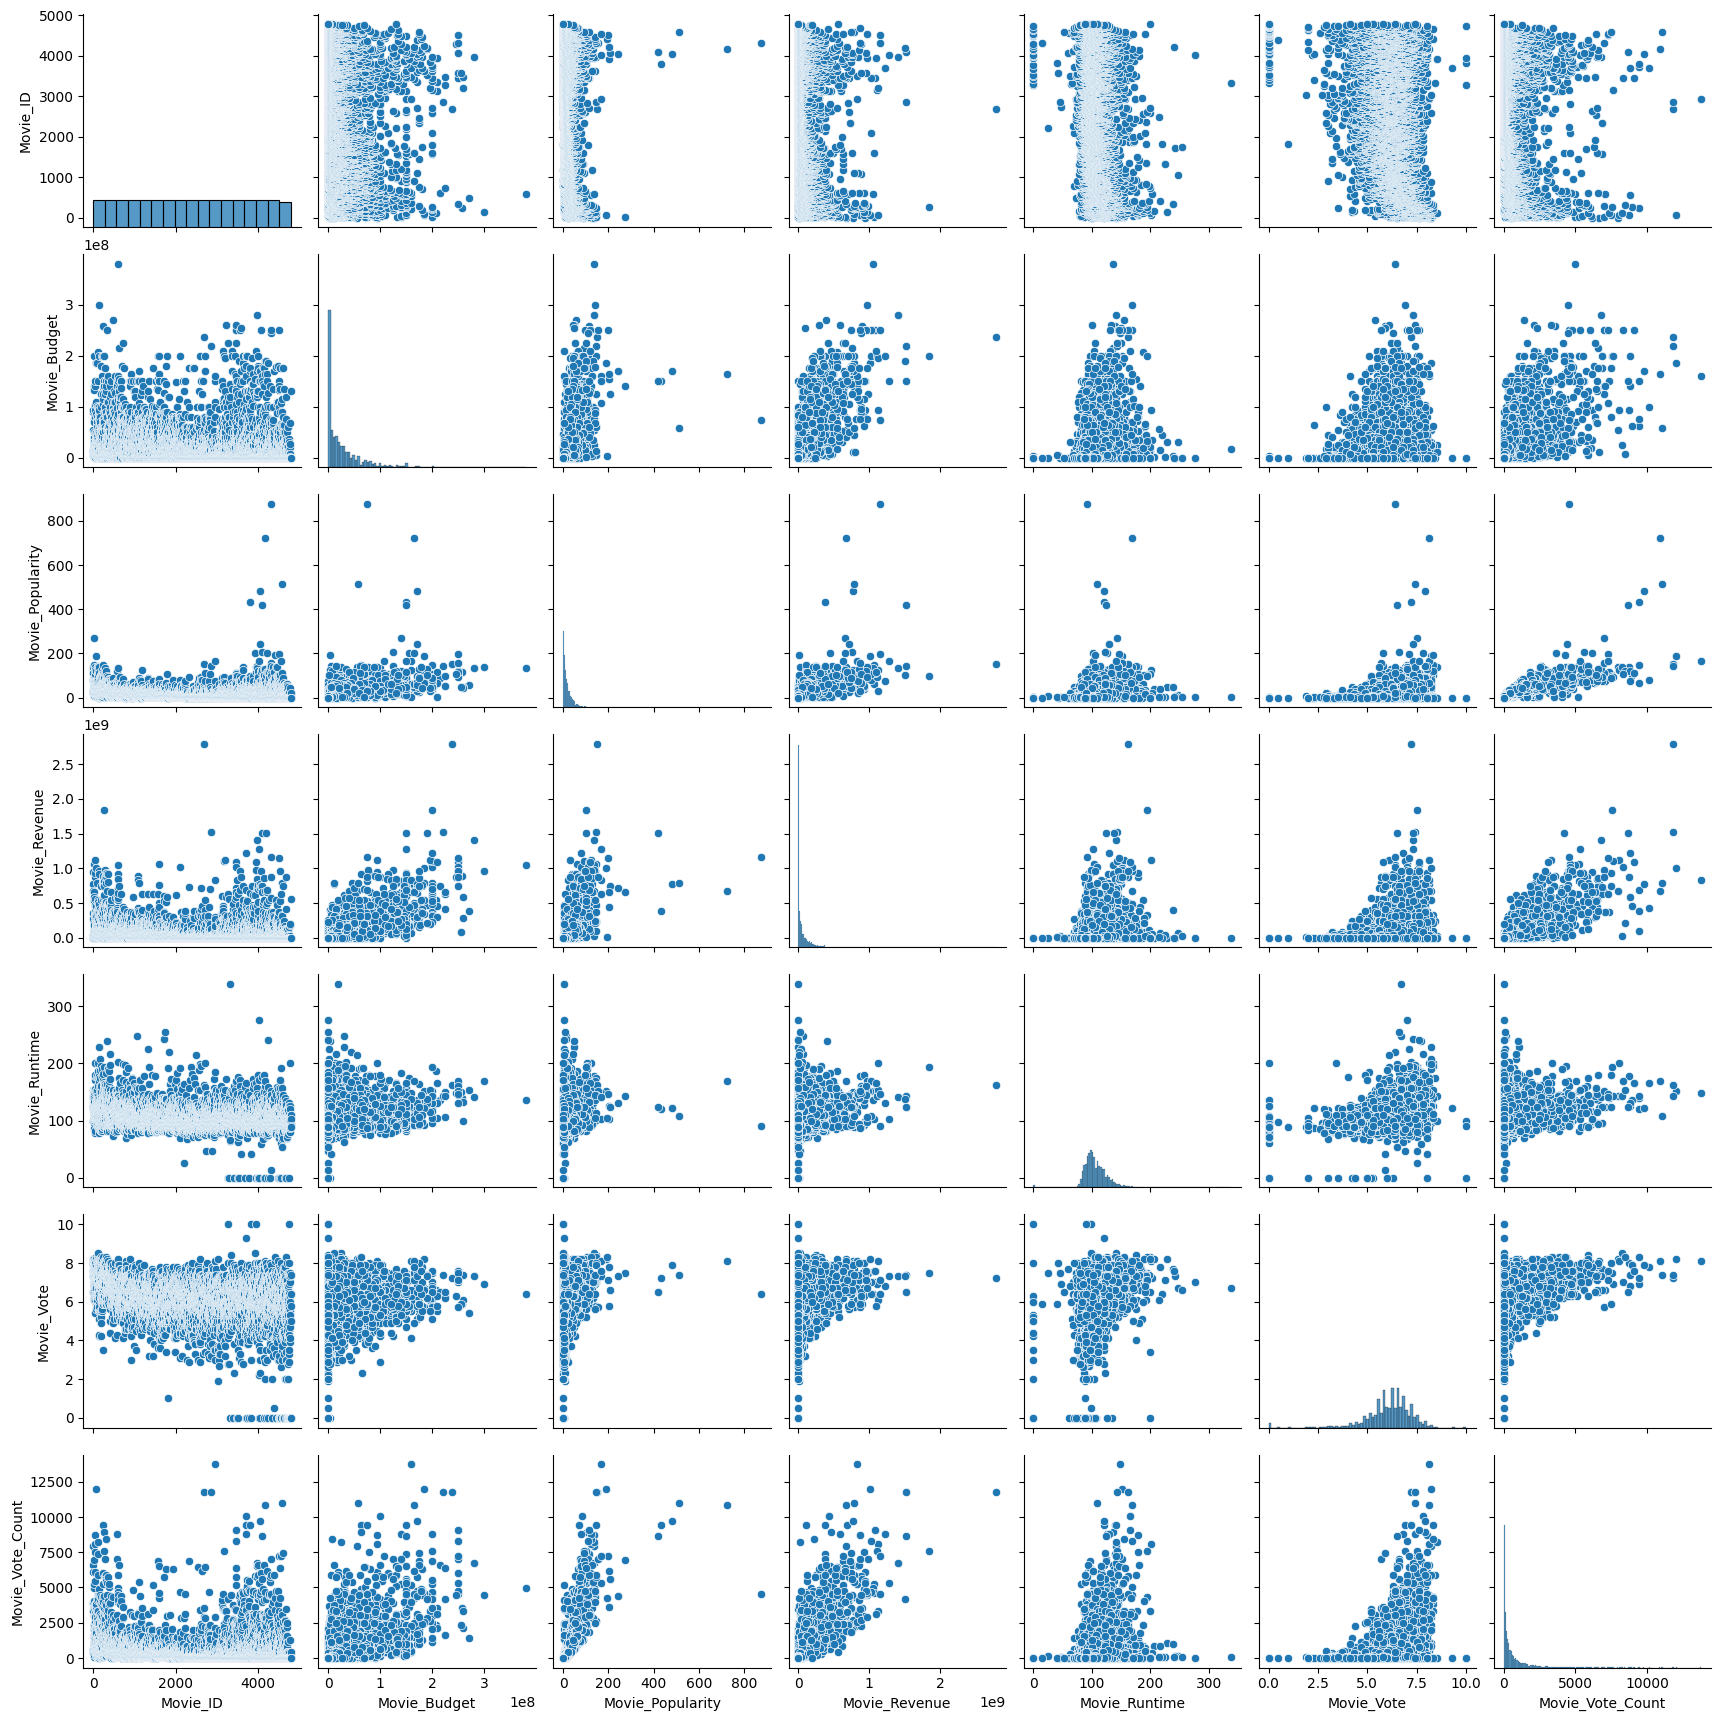

In [8]:
import seaborn as sns
sns.pairplot(df)

# Preprocessing Data

In [10]:
df_features = df[['Movie_Genre', 'Movie_Keywords', 'Movie_Tagline', 'Movie_Cast', 'Movie_Director']].fillna('')

In [11]:
df_features.shape

(4760, 5)

In [13]:
df_features

,Movie_Genre,Movie_Keywords,Movie_Tagline,Movie_Cast,Movie_Director
0,Crime Comedy,hotel new year's eve witch bet hotel room,Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,Allison Anders
1,Adventure Action Science Fiction,android galaxy hermit death star lightsaber,"A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,George Lucas
2,Animation Family,father son relationship harbor underwater fish...,"There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,Andrew Stanton
3,Comedy Drama Romance,vietnam veteran hippie mentally disabled runni...,"The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,Robert Zemeckis
4,Drama,male nudity female nudity adultery midlife cri...,Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,Sam Mendes
...,...,...,...,...,...
4755,Horror,,The hot spot where Satan's waitin'.,Lisa Hart Carroll Michael Des Barres Paul Drak...,Pece Dingo
4756,Comedy Family Drama,,It’s better to stand out than to fit in.,Roni Akurati Brighton Sharbino Jason Lee Anjul...,Frank Lotito
4757,Thriller Drama,christian film sex trafficking,She never knew it could happen to her...,Nicole Smolen Kim Baldwin Ariana Stephens Brys...,Jaco Booyens
4758,Family,,,,


In [15]:
X = df_features ['Movie_Genre'] +' '+ df_features ['Movie_Keywords'] +' '+ df_features ['Movie_Tagline'] +' '+ df_features [ 'Movie_Cast'] +' '+ df_features ['Movie_Director']

In [16]:
X

0       Crime Comedy hotel new year's eve witch bet ho...
1       Adventure Action Science Fiction android galax...
2       Animation Family father son relationship harbo...
3       Comedy Drama Romance vietnam veteran hippie me...
4       Drama male nudity female nudity adultery midli...
                              ...                        
4755    Horror  The hot spot where Satan's waitin'. Li...
4756    Comedy Family Drama  It’s better to stand out ...
4757    Thriller Drama christian film sex trafficking ...
4758                                           Family    
4759    Documentary music actors legendary perfomer cl...
Length: 4760, dtype: object

In [17]:
X.shape

(4760,)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf = TfidfVectorizer()

In [20]:
X= tfidf.fit_transform (X)

In [21]:
X.shape

(4760, 17258)

In [22]:
print(X)

  (0, 617)	0.1633382144407513
  (0, 492)	0.1432591540388685
  (0, 15413)	0.1465525095337543
  (0, 9675)	0.14226057295252661
  (0, 9465)	0.1659841367820977
  (0, 1390)	0.16898383612799558
  (0, 7825)	0.09799561597509843
  (0, 1214)	0.13865857545144072
  (0, 729)	0.13415063359531618
  (0, 13093)	0.1432591540388685
  (0, 15355)	0.10477815972666779
  (0, 9048)	0.0866842116160778
  (0, 11161)	0.06250380151644369
  (0, 16773)	0.17654247479915475
  (0, 5612)	0.08603537588547631
  (0, 16735)	0.10690083751525419
  (0, 7904)	0.13348000542112332
  (0, 15219)	0.09800472886453934
  (0, 11242)	0.07277788238484746
  (0, 3878)	0.11998399582562203
  (0, 5499)	0.11454057510303811
  (0, 7071)	0.19822417598406614
  (0, 7454)	0.14745635785412262
  (0, 1495)	0.19712637387361423
  (0, 9206)	0.15186283580984414
  :	:
  (4757, 5455)	0.12491480594769522
  (4757, 2967)	0.16273475835631626
  (4757, 8464)	0.23522565554066333
  (4757, 6938)	0.17088173678136628
  (4757, 8379)	0.17480603856721913
  (4757, 15303)	0.07

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

In [24]:
Similarity_Score = cosine_similarity (X)

In [25]:
Similarity_Score

array([[1.        , 0.01351235, 0.03570468, ..., 0.        , 0.        ,
        0.        ],
       [0.01351235, 1.        , 0.00806674, ..., 0.        , 0.        ,
        0.        ],
       [0.03570468, 0.00806674, 1.        , ..., 0.        , 0.08014876,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.08014876, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [26]:
Similarity_Score.shape

(4760, 4760)

In [28]:
Favourite_Movie_Name=input(' Enter your favourite movie name : ')

 Enter your favourite movie name :  Avtaar


In [29]:
All_Movies_Title_List = df['Movie_Title'].tolist()

In [30]:
import difflib

In [32]:
Movie_Recommendation = difflib.get_close_matches (Favourite_Movie_Name, All_Movies_Title_List)
print (Movie_Recommendation)

['Avatar']


In [34]:
Close_Match = Movie_Recommendation[0]
print (Close_Match)

Avatar


In [36]:
Index_of_Close_Match_Movie = df[df.Movie_Title == Close_Match] [ "Movie_ID"].values [0]
print (Index_of_Close_Match_Movie)

2692


In [37]:
Recommendation_Score = list(enumerate (Similarity_Score[Index_of_Close_Match_Movie]))
print (Recommendation_Score)

[(0, 0.009805093506053453), (1, 0.0), (2, 0.0), (3, 0.00800429043895183), (4, 0.0026759665928032302), (5, 0.009639835665946627), (6, 0.0049636657561850026), (7, 0.012848827437220958), (8, 0.0027543335470164663), (9, 0.00607882290416431), (10, 0.007539724639541887), (11, 0.0026263170118314906), (12, 0.002708340354961457), (13, 0.012904730427356216), (14, 0.0), (15, 0.022556564866386044), (16, 0.005959078936688496), (17, 0.0), (18, 0.013639824714195078), (19, 0.008784739948684396), (20, 0.0026527570934446066), (21, 0.015211614027840471), (22, 0.006522322352622825), (23, 0.0026429172195160193), (24, 0.0016564482636435309), (25, 0.025600660315408176), (26, 0.0024815199490618002), (27, 0.0047922703978129), (28, 0.0), (29, 0.023288277583204436), (30, 0.004648836119227042), (31, 0.006723965537835127), (32, 0.007984548069367697), (33, 0.018612326068635436), (34, 0.007439622267479848), (35, 0.0060612328203774185), (36, 0.0), (37, 0.0), (38, 0.008085428274959462), (39, 0.0046323263203813065), (4

In [38]:
len(Recommendation_Score)

4760

# Get All Movies Sort Based on Recommendation Score wrt Favourite Movie

In [39]:
Sorted_Similar_Movies = sorted (Recommendation_Score, key = lambda x:x[1], reverse = True)
print (Sorted_Similar_Movies)

[(2692, 1.0000000000000002), (3276, 0.11904275527845871), (3779, 0.10185805797079382), (62, 0.10153560702418994), (2903, 0.10063787314386034), (1647, 0.09397055536069451), (4614, 0.09362226751043302), (4375, 0.09117512301489193), (45, 0.08999324643162435), (1383, 0.08425242441722802), (110, 0.08361784775029485), (628, 0.08334515876919323), (1994, 0.08287835345252216), (2558, 0.08267633224298852), (1070, 0.08104448918225104), (4378, 0.07894345402700793), (1341, 0.07732693809361939), (1977, 0.07510309168081497), (3465, 0.07411089841255805), (3053, 0.0732438108456325), (4116, 0.07264153003988619), (1982, 0.07246569778553744), (2538, 0.06802035746289192), (3248, 0.06683400770968473), (3946, 0.06577120166835922), (3480, 0.06560363079666712), (254, 0.06351452702158421), (590, 0.06275727122098754), (3450, 0.06274272831079739), (1886, 0.06267985852941994), (4594, 0.0624699521049894), (2112, 0.06218435141221765), (84, 0.0618237599684129), (675, 0.06176991517572303), (3854, 0.06161566270378365),

In [43]:
print('Top 30 Movies Suggested for You: \n')
i = 1
for movie in Sorted_Similar_Movies:
    index = movie [0]
    title_from_index = df[df.index==index]['Movie_Title'].values[0]
    if (i<31):
        print(i, '.',title_from_index)
        i+=1

Top 30 Movies Suggested for You: 

1 . Niagara
2 . Caravans
3 . My Week with Marilyn
4 . Brokeback Mountain
5 . Harry Brown
6 . Night of the Living Dead
7 . The Curse of Downers Grove
8 . The Boy Next Door
9 . Back to the Future
10 . The Juror
11 . Some Like It Hot
12 . Enough
13 . The Kentucky Fried Movie
14 . Eye for an Eye
15 . Welcome to the Sticks
16 . Alice Through the Looking Glass
17 . Superman III
18 . The Misfits
19 . Premium Rush
20 . Duel in the Sun
21 . Sabotage
22 . Small Soldiers
23 . All That Jazz
24 . Camping Sauvage
25 . The Raid
26 . Beyond the Black Rainbow
27 . To Kill a Mockingbird
28 . World Trade Center
29 . The Dark Knight Rises
30 . Tora! Tora! Tora!


# Top 10 Movie Recommendation System

In [48]:
Movie_Name=input(' Enter your favourite movie name : ')
list_of_all_titles = df['Movie_Title'].tolist()
Find_Close_Match = difflib.get_close_matches (Movie_Name, list_of_all_titles)
Close_Match = Find_Close_Match[0]
Index_of_Movie = df[df.Movie_Title == Close_Match] ['Movie_ID'].values[0]
Recommendation_Score = list(enumerate(Similarity_Score [Index_of_Movie]))
sorted_similar_movies = sorted (Recommendation_Score, key = lambda x:x[1], reverse = True)
print('Top 10 Movies suggested for you: \n')
i=1
for movie in sorted_similar_movies:
    index = movie [0]
    title_from_index = df[df.Movie_ID==index]['Movie_Title'].values
    if (i<11):
        print(i,'.',title_from_index)
        i+=1

 Enter your favourite movie name :  American Beauty


Top 10 Movies suggested for you: 

1 . ['American Beauty']
2 . ['Lucky You']
3 . ['Monsters University']
4 . ['Green Room']
5 . ["She's the One"]
6 . ['Good Boy!']
7 . ['Ghost']
8 . ['Independence Daysaster']
9 . ['Mother and Child']
10 . ['Rise of the Guardians']
